In [45]:
import scipy.constants as sp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

r = np.linspace(0, 1, 100)

def hernquist(M, a, r):
    rho = M*a/(2*sp.pi*r*(r+a)**3)
    return rho  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


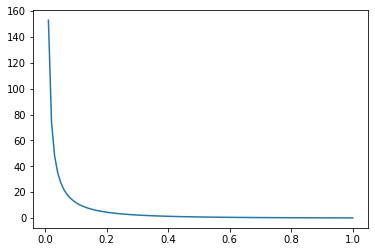

In [26]:
plt.plot(r, hernquist(10, 1, r))


In [44]:
# Surface mass density
def SMD(rho, z_lens, M, a):
    result = integrate.quad(rho, 0, z_lens, args=(M, a))
    return result[0]

E = SMD(hernquist, 2, 20, 1)
print(E)

0.0006874201191745831


In [42]:
# Distancia de diametro angular (Universo plano)
def d_angular(z):
    return z

# distance source - lens
def d_ls(zs, zl):
    ds = d_angular(zs)
    dl = d_angular(zl)
    return ds - (1+zl)/(1+zs)*dl

# CRITICAL surface mass density
def critical_dens(zs, zl):
    ds = d_angular(zs)
    dl = d_angular(zl)
    dls = d_ls(zs, zl)
    c_dens = ((sp.c**2)/(4*sp.pi*sp.G)) * (ds/(dl*dls))
    return c_dens

In [75]:
# comparar densidade com densidade critica

lens_df = pd.read_csv('masterlens.csv')
lens_df = lens_df.drop(columns=['discovery_date', 'ra_hrs', 'ra_mins', 
                                'ra_secs', 'dec_degrees', 'dec_arcmin', 'dec_arcsec'])
lens_df.head()

,system_name,ra_coord,dec_coord,lensgrade,number_images,theta_e,theta_e_err,z_lens,z_lens_err,z_source,z_source_err,vdisp,vdisp_err
0,SDSSJ0008-0004,2.012310,-0.068960,A,3,1.16,0.02,0.440,0.0001,1.192,0.001,232.0,39.0
1,ACSJ001423.02-302109.8,3.595917,-30.352722,B,1,1.52,0.01,NaN,NaN,NaN,NaN,NaN,NaN
2,ACSJ001426.26-302255.9,3.609417,-30.382194,A,1,1.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3,CSWA34,4.256430,-10.153088,NaN,2,NaN,NaN,0.500,0.1000,NaN,NaN,NaN,NaN
4,MACSJ0018.5+1626,4.640007,16.437859,A,0,24.00,2.00,0.545,NaN,NaN,NaN,NaN,NaN


In [76]:
lens_df['Density'] = critical_dens(lens_df['z_source'], lens_df['z_lens'])

In [77]:
lens_df.head()

,system_name,ra_coord,dec_coord,lensgrade,number_images,theta_e,theta_e_err,z_lens,z_lens_err,z_source,z_source_err,vdisp,vdisp_err,Density
0,SDSSJ0008-0004,2.012310,-0.068960,A,3,1.16,0.02,0.440,0.0001,1.192,0.001,232.0,39.0,3.215145e+26
1,ACSJ001423.02-302109.8,3.595917,-30.352722,B,1,1.52,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACSJ001426.26-302255.9,3.609417,-30.382194,A,1,1.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CSWA34,4.256430,-10.153088,NaN,2,NaN,NaN,0.500,0.1000,NaN,NaN,NaN,NaN,NaN
4,MACSJ0018.5+1626,4.640007,16.437859,A,0,24.00,2.00,0.545,NaN,NaN,NaN,NaN,NaN,NaN
